In [6]:

# import library

import os
from shutil import copy
import xml.etree.ElementTree as ET
import xml
from xml.dom import minidom
import imagesize
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
imagepath = '/data/jeongeun/openimage/JPEGImages'
xmllspath =  'set.txt'

In [26]:
class_dis = pd.read_csv('class.csv')
landmark_names = ['Shelf','Chest of drawers','Kitchen & dining room table','Coffee table','Table','Desk','Gas stove','Chair','Person',
        'Sink', 'Couch','Bottle', 'Sofa bed', 'Bed', 'Bookcase','Refrigerator','Piano','Television','Toilet','Cabinetry']
print(len(landmark_names))

class_dict = {}
lids = []
for i in class_dis.index:
    name = class_dis['name'][i]
    indx = class_dis['id'][i]
    if name in landmark_names:
        class_dict[indx] = name
        lids.append(indx)
print(class_dict)


20
{'/m/0130jx': 'Sink', '/m/01g317': 'Person', '/m/01mzpv': 'Chair', '/m/01s105': 'Cabinetry', '/m/01y9k5': 'Desk', '/m/02crq1': 'Couch', '/m/02wv84t': 'Gas stove', '/m/03m3pdh': 'Sofa bed', '/m/03ssj5': 'Bed', '/m/03__z0': 'Bookcase', '/m/040b_t': 'Refrigerator', '/m/04bcr3': 'Table', '/m/04dr76w': 'Bottle', '/m/05kyg_': 'Chest of drawers', '/m/05r5c': 'Piano', '/m/078n6m': 'Coffee table', '/m/07c52': 'Television', '/m/09g1w': 'Toilet', '/m/0gjbg72': 'Shelf', '/m/0h8n5zk': 'Kitchen & dining room table'}


In [27]:
imageids = []
with open('set.txt','r') as f:
    while True:
        a = f.readline()
        if a == '':
            break
        a = a.split('/')[1]
        a = a.split('\n')[0]
        imageids.append(a)

In [28]:
df = pd.read_csv('annotation_train.csv')

In [ ]:
ROOT = '/data/jeongeun/openimage'
imageids = iter(imageids)

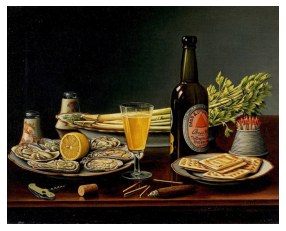

In [ ]:

imageid = next(imageids)
path = '{}/JPEGImages/{}.jpg'.format(ROOT, imageid)
width, height = imagesize.get(path)
src = cv2.imread(path)
annots = df.loc[df['ImageID']==imageid]
for i in annots.index:
    label = annots['LabelName'][i]
    if label in lids:
        label = class_dict[label]
        Xmin = int(width*annots['XMin'][i])
        Xmax = int(width*annots['XMax'][i])
        Ymin = int(height*annots['YMin'][i])
        Ymax = int(height*annots['YMax'][i])
        print(label,Xmax,Xmin,Ymax,Ymin)
        cv2.rectangle(src,(Xmin,Ymin),(Xmax,Ymax),(0,255,255),2)
        cv2.putText(src,str(label),(Xmin+1,Ymin+1),cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,255),2,cv2.FONT_HERSHEY_SIMPLEX)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(src)

### From XML

In [2]:
datapath = '/data/jeongeun/openimage/Annotations'
imagepath = '/data/jeongeun/openimage/JPEGImages'
xmllspath =  'set.txt' #'../../dataset/tasklist/t2_train.txt'

# datapath = '/data/jeongeun/OWOD_datasets/VOC2007/Annotations'
# imagepath = '/data/jeongeun//OWOD_datasets/VOC2007/JPEGImages'
# xmllspath =  '/data/jeongeun/OWOD_datasets/VOC2007/ImageSets/Main/all_task_test.txt'

In [3]:
with open(xmllspath, newline='') as f:
    data = f.read()


xmlls = data.split("\n")
while '' in xmlls:
    xmlls.remove('')
new_xmlls = []
for xmll in xmlls:
    new_xmlls.append(xmll.split('train/')[1])
xmlls = [data+'.xml' for data in new_xmlls]

# with open(xmllspath, newline='') as f:
#     data = f.read()


# xmlls = data.split("\n")
# while '' in xmlls:
#     xmlls.remove('')
# xmlls = [data+'.xml' for data in xmlls]

In [ ]:
count = 0
nogood = 0
xmlls = iter(xmlls)


In [5]:
singleXml = next(xmlls)
xmlname = os.path.join(datapath,singleXml)
doc = ET.parse(xmlname)
root = doc.getroot()
imagename = root.find('filename').text
filepath = os.path.join(imagepath,imagename)
objects = root.iter('object')
src = cv2.imread(filepath)

padboxs = []

objects = root.iter('object')
#Crop NONVOCclass
for annotation in objects:
    name = annotation.find('name').text
    print(name)
    bndbox = annotation.find('bndbox')
    
    x_l = int(bndbox.find('xmin').text)
    y_b = int(bndbox.find('ymin').text)
    x_r = int(bndbox.find('xmax').text)
    y_u = int(bndbox.find('ymax').text)
    print(x_l,y_b,x_r,y_u)
    
    cv2.rectangle(src,(x_l,y_b),(x_r,y_u),(0,255,255),2)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)

FileNotFoundError: [Errno 2] No such file or directory: '/data/jeongeun/openimage/Annotations/000020780ccee28d.xml'

In [1]:
import tqdm

In [4]:
for i in tqdm.tqdm(['a','b','c']):
    print(i)

100%|██████████| 3/3 [00:00<00:00, 27294.82it/s]

a
b
c
